<a href="https://colab.research.google.com/github/2019mohamed/ArabDialectClassification/blob/master/transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.5 MB/s 
     |████████████████████████████████| 596 kB 48.0 MB/s 
     |████████████████████████████████| 895 kB 43.9 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 6.5 MB 34.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('asafaya/bert-base-arabic')
model = BertModel.from_pretrained('asafaya/bert-base-arabic')

Downloading:   0%|          | 0.00/326k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/491 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the model checkpoint at asafaya/bert-base-arabic were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/two_clo_dialect_dataset.csv')
df

,new_text,label
0,بالنهايه ينتفض يغير,0
1,يعني محسوب البشر حيونه ووحشيه وتطلبون الغرب يح...,0
2,مبين كلامه خليجي,0
3,يسلملي مرورك وروحك الحلوه,0
4,وين الغيبه اخ محمد,0
...,...,...
458192,مبسوطين منك اللي باسطانا,17
458193,والله ماينده ابش يختي,17
458194,شو عملنا حنا تهربي مننا احنا مساكين ليش بتعملي...,17
458195,الله يبارك وبالعافيه,17


In [ ]:
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
corpus = df['new_text'].astype('str').tolist()
labels = df['label'].tolist()

In [ ]:
def get_index ():
  freqs = df['label'].value_counts()

  start = [0 for _ in range(18)]
  start[0] = 0
  for c in range(1,18):
      start[c] += freqs[c-1] + start[c-1]  
  indexes = []# (mini , maxi+1) for all classes
  for c in range(18):
      indexes.append(  (start[c] , start[c] + freqs[c]) )
    
  return indexes

In [ ]:
import numpy as np

def sample_data (data , label ,intervals, lim = 20):
  data = np.array(data)
  label = np.array(label)
  ret = np.array([])
  retl = np.array([])
  for i in range(18):
    l = intervals[i][0]
    h = intervals[i][1]
    index = np.random.choice(range(l,h), size = lim , replace = False )
    ret = np.concatenate((ret , data[index]), axis = 0)
    retl = np.concatenate((retl , label[index]), axis = 0)

  return ret,retl

In [ ]:
indexes = get_index()

In [ ]:
sample_corpus, sample_label = sample_data(corpus , labels, indexes, lim = 100 )

In [ ]:
sample_corpus.shape,' ',sample_label.shape

((1800,), ' ', (1800,))

In [ ]:
X =  [tokenizer(text,padding='max_length', max_length = 32, truncation=True,
                                return_tensors="pt") for text in sample_corpus]

In [ ]:
X[0]

{'input_ids': tensor([[    2,  5128,  1808, 17387,  2723, 21498,  1023, 15084,  1027, 10230,
          1778, 27350, 17860,  1021, 22715,  2522,  1006,  1070,  2209, 15882,
          5267,  2948,     3,     0,     0,     0,     0,     0,     0,     0,
             0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])}

In [ ]:
Z= np.array([])
for _ in range(len(X)):
  input_id = X[_]['input_ids']
  mask = X[_]['attention_mask']
  _,pool = model(return_dict = False , input_ids= input_id, attention_mask=mask)
  if Z.shape[0] == 0:
    Z = pool.detach().numpy()
  else:
    Z = np.concatenate((Z , pool.detach().numpy()) , axis = 0)

In [ ]:
Z.shape

(1800, 768)

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 39.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=3b5d2c25df28aa2f7d26b6d8a97af38ce545dd9d8f8c2802c158d959514f926a
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=4f5c73a9cf0fca38b9279db3d27430b003f9421a5bb9b2e6d392f614b25940ab
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap
fit = umap.UMAP(n_components = 2)
u = fit.fit_transform(Z)

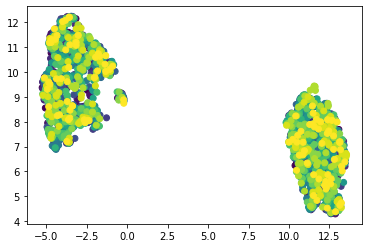

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(u[:,0], u[:,1], c=sample_label)